In [2]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report,accuracy_score
import joblib
from imblearn.over_sampling import SMOTE
from tqdm import tqdm

In [2]:
data_tr1=pd.read_csv(r"C:\Users\navee\OneDrive\Desktop\Microsoft cybersecurity\GUIDE_Train.csv")

In [3]:
data_tr1

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [4]:
list(data_tr1.columns)

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City']

In [5]:
pd.set_option('display.max_columns', None)
data_tr1.head(1)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,NaN,NaN,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3


In [6]:
data_tr1.shape

(9516837, 45)

In [7]:
data_tr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

**DATA HANDLING**

In [8]:
(data_tr1.isnull().sum()/(len(data_tr1)))*100

Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       57.460120
IncidentGrade          0.539465
ActionGrouped         99.410897
ActionGranular        99.410897
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        98.982729
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApplicationId     0.000000
ThreatFa

In [9]:
threshold= len(data_tr1)* 0.5   
data_tr1=data_tr1.dropna(thresh=threshold,axis=1)

In [10]:
data_tr1.shape

(9516837, 35)

In [11]:
data_tr1.duplicated().sum()

np.int64(546298)

In [12]:
data_tr1.drop_duplicates(inplace=True)

C:\Users\navee\AppData\Local\Temp\ipykernel_16636\1640473675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1.drop_duplicates(inplace=True)


In [13]:
data_tr1.duplicated().sum()

np.int64(0)

In [14]:
data_tr1.isnull().sum()

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         47734
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                      0
dtype: int64

In [15]:
data_tr1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8970539 entries, 0 to 9516836
Data columns (total 35 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   Timestamp           object
 5   DetectorId          int64 
 6   AlertTitle          int64 
 7   Category            object
 8   IncidentGrade       object
 9   EntityType          object
 10  EvidenceRole        object
 11  DeviceId            int64 
 12  Sha256              int64 
 13  IpAddress           int64 
 14  Url                 int64 
 15  AccountSid          int64 
 16  AccountUpn          int64 
 17  AccountObjectId     int64 
 18  AccountName         int64 
 19  DeviceName          int64 
 20  NetworkMessageId    int64 
 21  RegistryKey         int64 
 22  RegistryValueName   int64 
 23  RegistryValueData   int64 
 24  ApplicationId       int64 
 25  ApplicationName     int

In [ ]:
data_tr1["IncidentGrade"].fillna(data_tr1["IncidentGrade"].mode()[0],inplace=True)

C:\Users\navee\AppData\Local\Temp\ipykernel_16636\2004624072.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_tr1["IncidentGrade"].fillna(data_tr1["IncidentGrade"].mode()[0],inplace=True)
C:\Users\navee\AppData\Local\Temp\ipykernel_16636\2004624072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1["IncidentGrade"].fillna(dat

In [17]:
data_tr1.IncidentGrade.unique()

array(['TruePositive', 'FalsePositive', 'BenignPositive'], dtype=object)

In [18]:
data_tr1['Timestamp']=pd.to_datetime(data_tr1['Timestamp'])

C:\Users\navee\AppData\Local\Temp\ipykernel_16636\3018012391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1['Timestamp']=pd.to_datetime(data_tr1['Timestamp'])


In [19]:
data_tr1['Timestamp'].head()

0   2024-06-04 06:05:15+00:00
1   2024-06-14 03:01:25+00:00
2   2024-06-13 04:52:55+00:00
3   2024-06-10 16:39:36+00:00
4   2024-06-15 01:08:07+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [20]:
data_tr1["Day"]=data_tr1["Timestamp"].dt.day
data_tr1["Month"]=data_tr1["Timestamp"].dt.month
data_tr1["Year"]=data_tr1["Timestamp"].dt.year
data_tr1["Hour"]=data_tr1["Timestamp"].dt.hour
data_tr1["Time"]=data_tr1["Timestamp"].dt.time

C:\Users\navee\AppData\Local\Temp\ipykernel_16636\720852404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1["Day"]=data_tr1["Timestamp"].dt.day
C:\Users\navee\AppData\Local\Temp\ipykernel_16636\720852404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1["Month"]=data_tr1["Timestamp"].dt.month
C:\Users\navee\AppData\Local\Temp\ipykernel_16636\720852404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [21]:
data_tr1.drop("Timestamp",axis=1,inplace=True)   
print(data_tr1.head())

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0   180388628218      0         612   123247           7           6   
1   455266534868     88         326   210035          58          43   
2  1056561957389    809       58352   712507         423         298   
3  1279900258736     92       32992   774301           2           2   
4   214748368522    148        4359   188041           9          74   

            Category   IncidentGrade EntityType EvidenceRole  DeviceId  \
0      InitialAccess    TruePositive         Ip      Related     98799   
1       Exfiltration   FalsePositive       User     Impacted     98799   
2      InitialAccess   FalsePositive        Url      Related     98799   
3  CommandAndControl  BenignPositive        Url      Related     98799   
4          Execution    TruePositive       User     Impacted     98799   

   Sha256  IpAddress     Url  AccountSid  AccountUpn  AccountObjectId  \
0  138268         27  160396      441377      673

C:\Users\navee\AppData\Local\Temp\ipykernel_16636\2391982935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1.drop("Timestamp",axis=1,inplace=True)


In [22]:
data_tr1['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    3875534
TruePositive      3140126
FalsePositive     1954879
Name: count, dtype: int64

In [23]:
data_tr1.Category.unique()

array(['InitialAccess', 'Exfiltration', 'CommandAndControl', 'Execution',
       'SuspiciousActivity', 'Impact', 'Collection', 'CredentialAccess',
       'Persistence', 'Discovery', 'Malware', 'DefenseEvasion', 'Exploit',
       'PrivilegeEscalation', 'LateralMovement', 'Ransomware',
       'UnwantedSoftware', 'CredentialStealing', 'WebExploit',
       'Weaponization'], dtype=object)

In [24]:
data_tr1.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Day                   0
Month                 0
Year                  0
Hour                  0
Time                  0
dtype: int64

**DATA HANDLING**

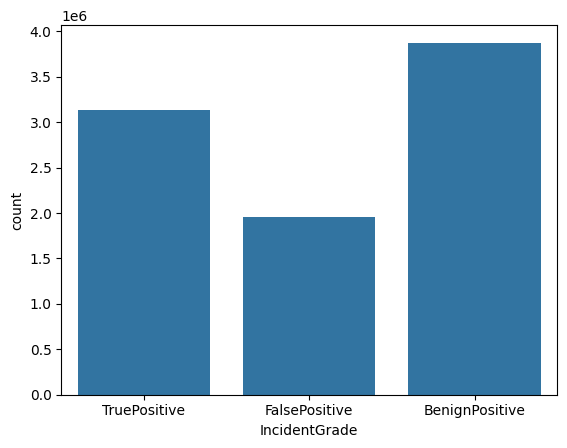

In [25]:
sns.countplot(x="IncidentGrade", data=data_tr1)
plt.show()

In [26]:
day_incident_grade = data_tr1.groupby(['Day', 'IncidentGrade']).size().unstack()

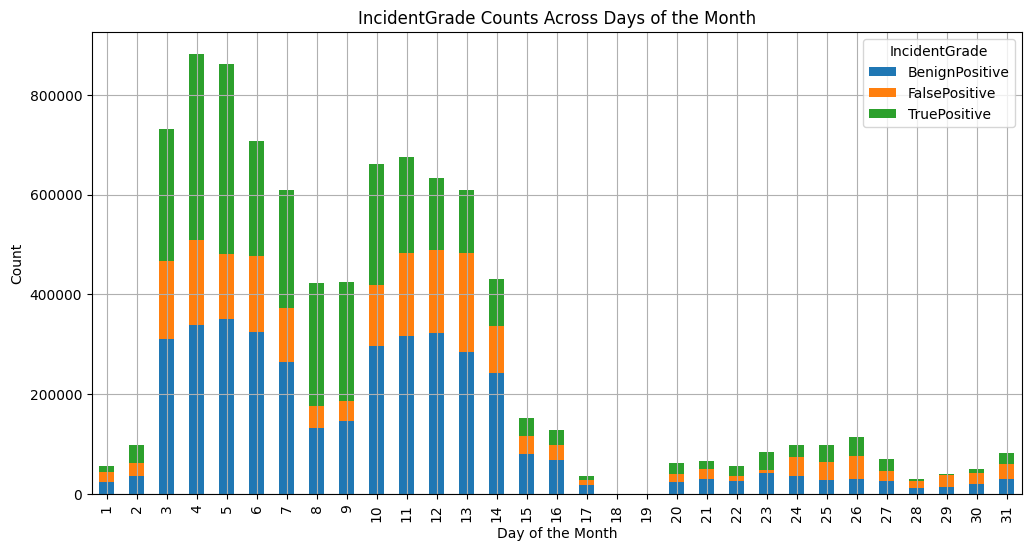

In [27]:
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

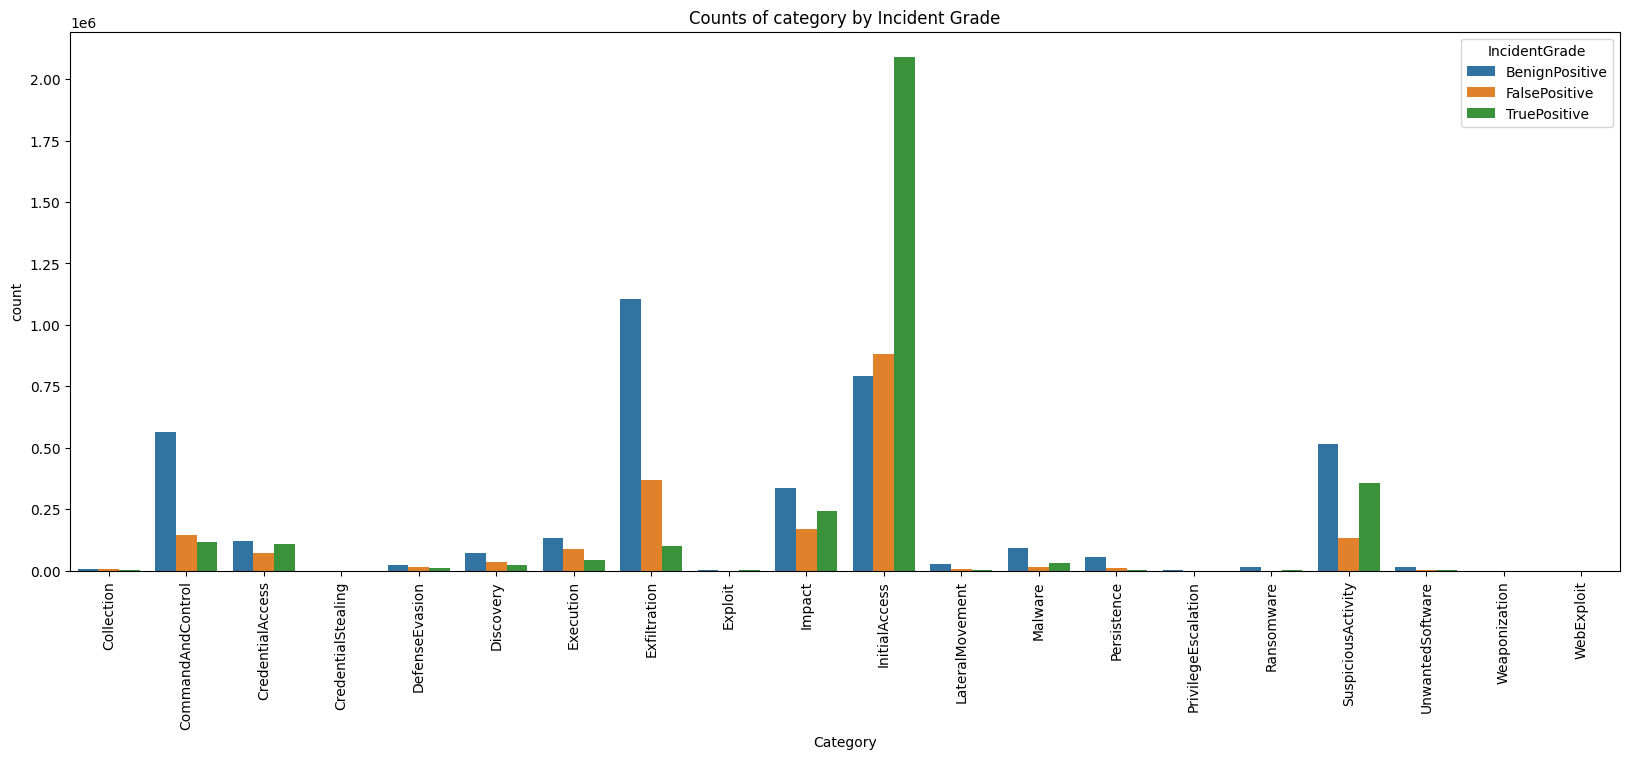

In [29]:
grouped_data=data_tr1.groupby(["Category","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="Category", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of category by Incident Grade")
plt.show()

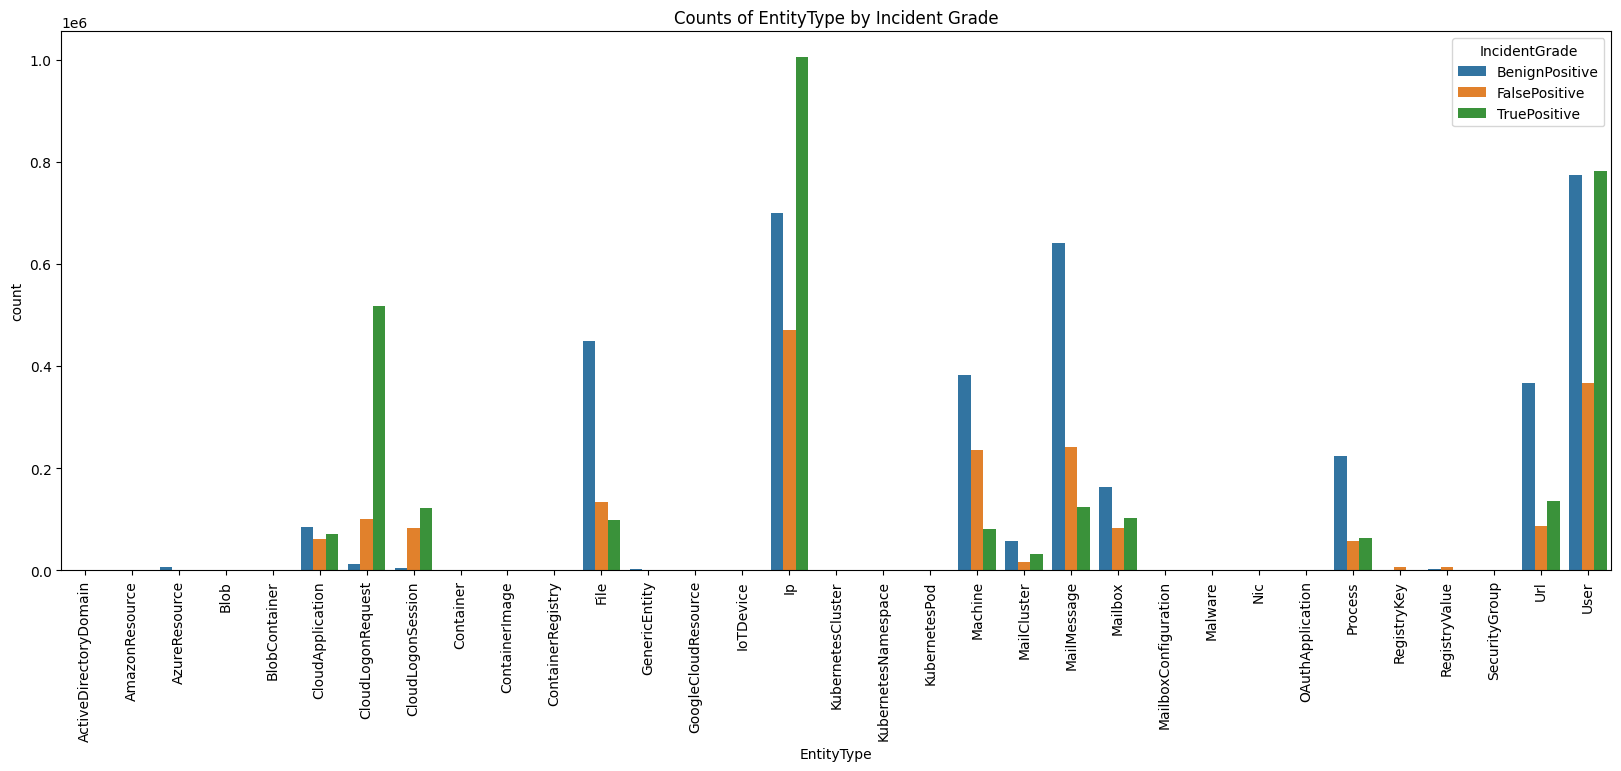

In [30]:
grouped_data=data_tr1.groupby(["EntityType","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="EntityType", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of EntityType by Incident Grade")
plt.show()

In [32]:
data_tr1.drop(["Month","DeviceName","DeviceId","ResourceIdName","OAuthApplicationId","NetworkMessageId"], axis =1 , inplace = True)

C:\Users\navee\AppData\Local\Temp\ipykernel_16636\3403023776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1.drop(["Month","DeviceName","DeviceId","ResourceIdName","OAuthApplicationId","NetworkMessageId"], axis =1 , inplace = True)


In [33]:
data_tr1['State'].fillna(data_tr1['State'].mode()[0], inplace=True)
data_tr1['CountryCode'].fillna(data_tr1['CountryCode'].mode()[0], inplace=True)
data_tr1['City'].fillna(data_tr1['City'].mode()[0], inplace=True)

C:\Users\navee\AppData\Local\Temp\ipykernel_16636\479307398.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_tr1['State'].fillna(data_tr1['State'].mode()[0], inplace=True)
C:\Users\navee\AppData\Local\Temp\ipykernel_16636\479307398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1['State'].fillna(data_tr1['State'].mode()[0],

In [34]:
data_tr1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8970539 entries, 0 to 9516836
Data columns (total 33 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Id                 int64 
 1   OrgId              int64 
 2   IncidentId         int64 
 3   AlertId            int64 
 4   DetectorId         int64 
 5   AlertTitle         int64 
 6   Category           object
 7   IncidentGrade      object
 8   EntityType         object
 9   EvidenceRole       object
 10  Sha256             int64 
 11  IpAddress          int64 
 12  Url                int64 
 13  AccountSid         int64 
 14  AccountUpn         int64 
 15  AccountObjectId    int64 
 16  AccountName        int64 
 17  RegistryKey        int64 
 18  RegistryValueName  int64 
 19  RegistryValueData  int64 
 20  ApplicationId      int64 
 21  ApplicationName    int64 
 22  FileName           int64 
 23  FolderPath         int64 
 24  OSFamily           int64 
 25  OSVersion          int64 
 26  CountryCode        

**FEATURE SELECTION AND CORRELATION**

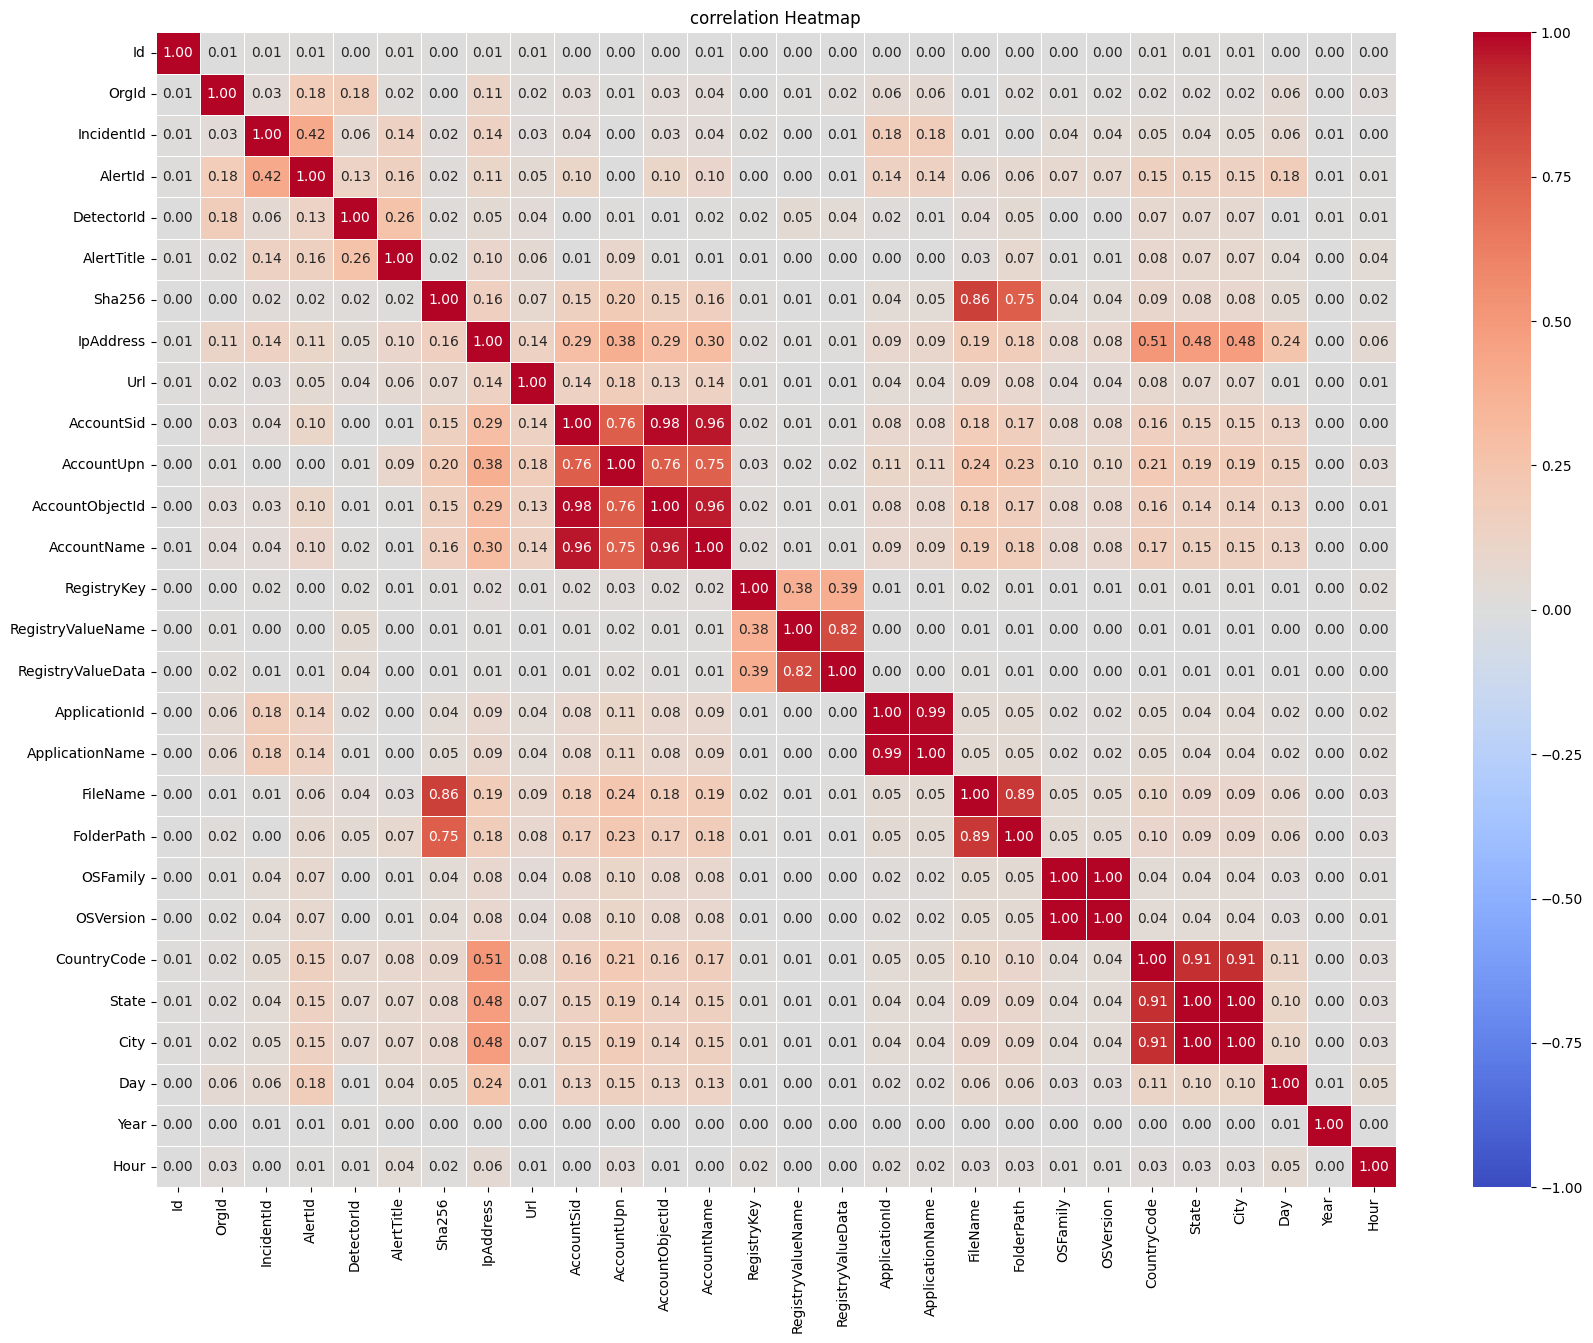

In [35]:
numeric_df=data_tr1.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [36]:
data_tr1.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"], axis =1 , inplace = True)
     

C:\Users\navee\AppData\Local\Temp\ipykernel_16636\886920973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"], axis =1 , inplace = True)


In [37]:
data_tr1.drop(["RegistryKey","RegistryValueData","DetectorId","Id" ], axis =1 , inplace = True)

C:\Users\navee\AppData\Local\Temp\ipykernel_16636\3152934443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1.drop(["RegistryKey","RegistryValueData","DetectorId","Id" ], axis =1 , inplace = True)


In [38]:
data_tr1.drop(["OSFamily","OSVersion",'State','FileName','AccountName' ], axis =1 , inplace = True)

C:\Users\navee\AppData\Local\Temp\ipykernel_16636\387331248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1.drop(["OSFamily","OSVersion",'State','FileName','AccountName' ], axis =1 , inplace = True)


In [39]:
data_tr1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8970539 entries, 0 to 9516836
Data columns (total 16 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   OrgId          int64 
 1   IncidentId     int64 
 2   AlertId        int64 
 3   AlertTitle     int64 
 4   Category       object
 5   IncidentGrade  object
 6   EntityType     object
 7   EvidenceRole   object
 8   IpAddress      int64 
 9   Url            int64 
 10  ApplicationId  int64 
 11  City           int64 
 12  Day            int32 
 13  Year           int32 
 14  Hour           int32 
 15  Time           object
dtypes: int32(3), int64(8), object(5)
memory usage: 1.0+ GB


**ENCODING**

In [40]:
data_tr1.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time'], dtype='object')

In [41]:
Categorical_coltr=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time']

Label encoder

In [42]:
encoders = {}
for i in Categorical_coltr:
    le = LabelEncoder()
    data_tr1[i]=le.fit_transform(data_tr1[i])
    encoders[i]=le

C:\Users\navee\AppData\Local\Temp\ipykernel_16636\2118965513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1[i]=le.fit_transform(data_tr1[i])
C:\Users\navee\AppData\Local\Temp\ipykernel_16636\2118965513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1[i]=le.fit_transform(data_tr1[i])
C:\Users\navee\AppData\Local\Temp\ipykernel_16636\2118965513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [43]:
data_tr1

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,0,612,123247,6,10,2,15,1,27,160396,2251,3,4,2024,6,21915
1,88,326,210035,43,7,1,32,0,360606,160396,2251,10630,14,2024,3,10885
2,809,58352,712507,298,10,1,31,1,360606,68652,2251,10630,13,2024,4,17575
3,92,32992,774301,2,1,0,31,1,360606,13,2251,10630,10,2024,16,59976
4,148,4359,188041,74,6,2,32,0,360606,160396,2251,10630,15,2024,1,4087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,0,90,496631,6,10,2,6,1,360606,160396,2251,10630,8,2024,15,55568
9516833,59,196410,748366,2,1,0,31,1,360606,164,2251,10630,6,2024,9,34808
9516834,44,14117,7425,57,7,0,21,0,360606,160396,2251,10630,11,2024,22,82263
9516835,43,644,8973,10,9,0,15,1,465,160396,2251,10630,20,2024,23,82861


In [44]:
data_tr1.select_dtypes(include=["int32", "int64","float64"]).columns

Index(['OrgId', 'IncidentId', 'AlertId', 'AlertTitle', 'Category',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'IpAddress', 'Url',
       'ApplicationId', 'City', 'Day', 'Year', 'Hour', 'Time'],
      dtype='object')

In [46]:
data_tr1.to_csv(r"C:\Users\navee\OneDrive\Desktop\Microsoft cybersecurity\Processed_Data/datatrain_process.csv",index= False)

In [3]:
data_tr1 = pd.read_csv(r"C:\Users\navee\OneDrive\Desktop\Microsoft cybersecurity\Processed_Data\datatrain_process.csv")

**TRAIN TEST SPLIT**

In [4]:
data_tr1.head()

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,0,612,123247,6,10,2,15,1,27,160396,2251,3,4,2024,6,21915
1,88,326,210035,43,7,1,32,0,360606,160396,2251,10630,14,2024,3,10885
2,809,58352,712507,298,10,1,31,1,360606,68652,2251,10630,13,2024,4,17575
3,92,32992,774301,2,1,0,31,1,360606,13,2251,10630,10,2024,16,59976
4,148,4359,188041,74,6,2,32,0,360606,160396,2251,10630,15,2024,1,4087


In [5]:
from imblearn.over_sampling import RandomOverSampler

In [6]:
os =RandomOverSampler(random_state = 94)

In [7]:
val =data_tr1.drop('IncidentGrade', axis =1)

In [8]:
tar = data_tr1['IncidentGrade']

In [9]:
tar.value_counts()

IncidentGrade
0    3875534
2    3140126
1    1954879
Name: count, dtype: int64

In [10]:
oval,otar = os.fit_resample(val,tar)

In [11]:
otar.value_counts()

IncidentGrade
2    3875534
1    3875534
0    3875534
Name: count, dtype: int64

In [13]:
print(oval.shape)
print(otar.shape)

(11626602, 15)
(11626602,)


**Feature selection**

In [14]:
fs = RandomForestClassifier(n_estimators=100, random_state=79)

In [16]:
fs.fit(oval,otar)

RandomForestClassifier(random_state=79)

In [17]:
pd.DataFrame({
    "columns": oval.columns,
    "Score": fs.feature_importances_
}).sort_values('Score', ascending =False).head(15)["columns"].to_list()

['OrgId',
 'IncidentId',
 'AlertTitle',
 'AlertId',
 'Category',
 'Day',
 'Time',
 'EntityType',
 'Hour',
 'IpAddress',
 'City',
 'Url',
 'EvidenceRole',
 'ApplicationId',
 'Year']

In [18]:
oval = oval[['OrgId',
 'IncidentId',
 'AlertId',
 'AlertTitle',
 'Day',
 'Category',
 'Time',
 'EntityType',
 'Hour',
 'IpAddress',
 'City',
 'Url',
 'EvidenceRole',
 'ApplicationId',
 'Year']]

**Train Test Split**

In [19]:
traindata,testdata, trainlab,testlab = train_test_split(oval,otar, test_size = 0.20, random_state = 43)

In [20]:
traindata.shape

(9301281, 15)

In [21]:
testdata.shape

(2325321, 15)

**Model building**

In [22]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import xgboost

In [23]:
dt_model= DecisionTreeClassifier(max_depth=8,random_state=100,min_samples_split=10,min_samples_leaf=5,max_features="sqrt")

In [24]:
dt_model.fit(traindata,trainlab)

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=100)

In [25]:
def metrics(actual, predicted):
    acc = accuracy_score(actual, predicted) * 100
    prec = precision_score(actual, predicted, average="macro") * 100
    recall = recall_score(actual, predicted, average="macro") * 100
    macro_f1 = f1_score(actual, predicted, average="macro") * 100

    return pd.DataFrame({
        "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
        "Values": [acc, prec, recall, macro_f1]
    }).set_index("Metrics")

In [26]:
dttr_pred =dt_model.predict(traindata)
dtts_pred =dt_model.predict(testdata)

In [27]:
dttrain_metrics=metrics(trainlab,dttr_pred)

In [28]:
dttest_metrics=metrics(testlab,dtts_pred)

In [29]:
pd.DataFrame({
    "Training":dttrain_metrics["Values"],
    "Testing":dttest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,68.375625,68.433175
1,Precision,72.975373,73.018071
2,Recall,68.376568,68.429412
3,Macro F1,68.764450,68.822162


**RANDOM FOREST**

In [30]:
rfc =RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=200,n_jobs=-1,random_state=100)

In [31]:
rfc.fit(traindata,trainlab)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=100)

In [32]:
rftr_pred =rfc.predict(traindata)
rfts_pred =rfc.predict(testdata)

In [33]:
rftrain_metrics=metrics(trainlab,rftr_pred)
rftest_metrics=metrics(testlab,rfts_pred)

In [34]:
pd.DataFrame({
    "Training":rftrain_metrics["Values"],
    "Testing":rftest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,78.409533,78.476606
1,Precision,83.590372,83.615170
2,Recall,78.410977,78.470845
3,Macro F1,78.809678,78.874341


**XGBoost**

In [35]:
xgbmodel = xgboost.XGBClassifier(n_estimators=200,learning_rate=0.1,random_state=100,n_jobs=-1,max_depth=8)

In [36]:
xgbmodel.fit(traindata,trainlab)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [37]:
xgbtr_pred =xgbmodel.predict(traindata)
xgbts_pred =xgbmodel.predict(testdata)

In [38]:
xgbtrain_metrics = metrics(trainlab,xgbtr_pred)
xgbtest_metrics =metrics(testlab,xgbts_pred)

In [39]:
pd.DataFrame({
    "Training":xgbtrain_metrics["Values"],
    "Testing":xgbtest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,93.442978,93.387924
1,Precision,93.496302,93.441521
2,Recall,93.443036,93.387712
3,Macro F1,93.450918,93.396399
